# Outline
1. Linear Regression
1. Polynomical Regression
1. Sigmoid

# Understanding the Data
- **TARGET COUNTRY** Japan
- **DATE RANGE** HOGEHOGE - March 31st, 2020
- **COLIMNS** ID, AccumulatedCases, Fatalities
- **VALUE RANGE（AccumulatedCases）** 2 - 1953
- **VALUE RANGE（Fatalities）** 0 - 56

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline

# Linear Regression

In [69]:
df = pd.read_csv("train.csv")
df = df.drop(['Province_State', 'Date'], axis = 1)
df = df.query('Country_Region == "Japan"')
df = df.rename(columns={'ConfirmedCases':'AccumulatedCases'})
df.Id = df.Id - 14200
#df = df.query('Id > 30')
df.tail(70)

,Id,Country_Region,AccumulatedCases,Fatalities
9940,1,Japan,2.0,0.0
9941,2,Japan,2.0,0.0
9942,3,Japan,2.0,0.0
9943,4,Japan,2.0,0.0
9944,5,Japan,4.0,0.0
...,...,...,...,...
10005,66,Japan,1468.0,49.0
10006,67,Japan,1693.0,52.0
10007,68,Japan,1866.0,54.0
10008,69,Japan,1866.0,54.0


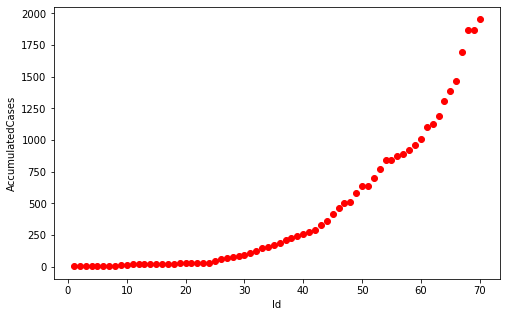

In [70]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

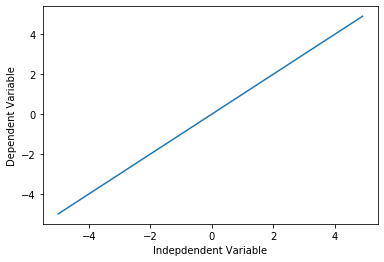

In [71]:
X = np.arange(-5.0, 5.0, 0.1)
#Y = 1.0 / (1.0 + np.exp(-X))
Y = 1.0*X

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Model ###

In [72]:
def linearxx(x, Beta_1,Beta_2):
     y = Beta_1+Beta_2*x
     return y

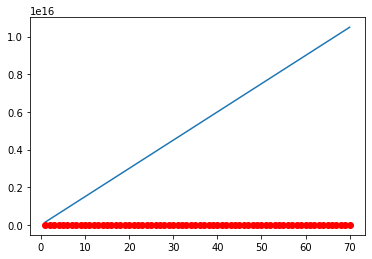

In [37]:
beta_1 = 0.10
beta_2 = 1000.0
#logistic function
Y_pred = linearxx(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

In [38]:
# Lets normalize our data
xdata =np.log(x_data/max(x_data))
ydata =np.log(y_data/max(y_data))

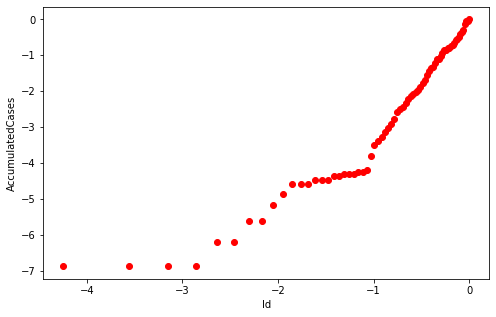

In [40]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [41]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(linearxx, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

 beta_1 = -0.775745±0.110427, beta_2 = 2.081775±0.083935


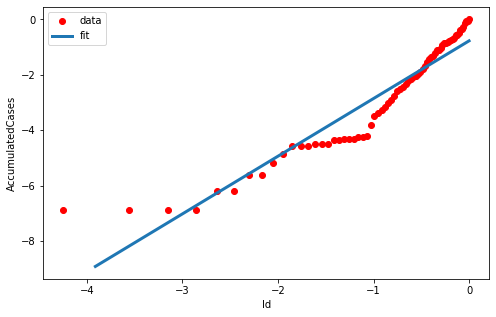

In [42]:
x = np.linspace(100,5000, 4990)
x = np.log(x/max(x))
plt.figure(figsize=(8,5))
y = linearxx(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')

plt.savefig('LinearRegressionAnalysis.png')

plt.show()

## Accuracy

In [43]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(linearxx, train_x, train_y)

# predict using test set
y_hat = linearxx(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.49
Residual sum of squares (MSE): 0.37
R2-score: 0.92


# Non-Linear Regression:Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 

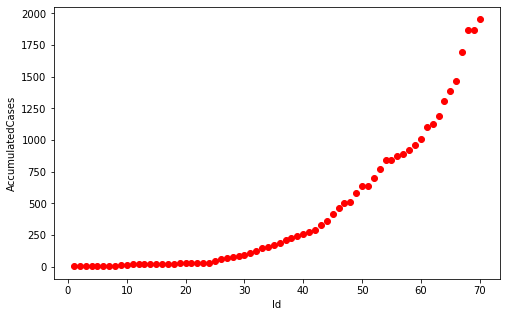

In [45]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

## Model ###

In [46]:
def exponential(x,Beta1, Beta2):
     y = Beta2*np.exp(Beta1*x)
     #y = Beta1+beta2*np.exp(Beta3*x)
     return y

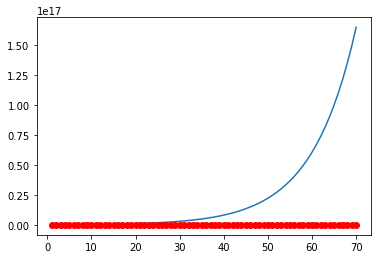

In [47]:
beta_1 = 0.10 #y = Beta2*np.exp(Beta1*x)
    
beta_2 = 1000.0
#logistic function
Y_pred = exponential(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

### Normalization

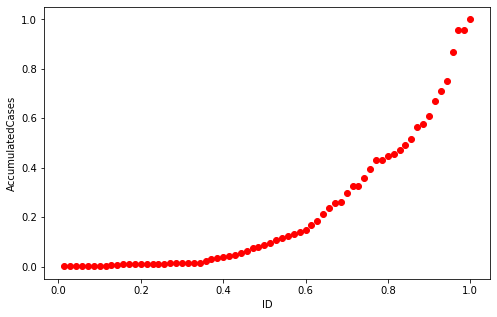

In [48]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

plt.figure(figsize=(8,5))
#x_data, y_data = (df[""].values, df["Date"].values)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('ID')
plt.show()

In [49]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

 beta_1 = 4.575518±0.082928, beta_2 = 0.010586±0.000794


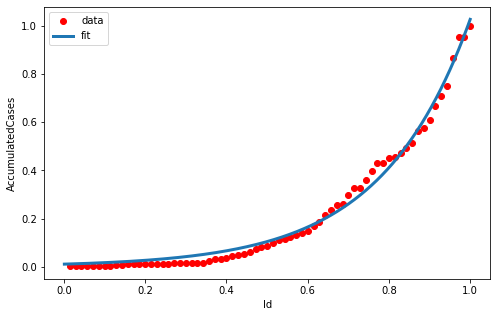

In [50]:
x = np.linspace(1,1257, 1256)
x = x/max(x)
plt.figure(figsize=(8,5))
y = exponential(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')

plt.savefig('ExponentialAnalysis.png')


plt.show()

## Accuracy 

In [51]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(exponential, train_x, train_y)

# predict using test set
y_hat = exponential(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99


# Non-Linear Regression: Sigmoid Regression

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

In [52]:
df = pd.read_csv("train.csv")
df = df.drop(['Province_State', 'Date'], axis = 1)
df = df.query('Country_Region == "Japan"')
df = df.rename(columns={'ConfirmedCases':'AccumulatedCases'})
df.Id = df.Id - 14201
df.tail(70)

,Id,Country_Region,AccumulatedCases,Fatalities
9940,0,Japan,2.0,0.0
9941,1,Japan,2.0,0.0
9942,2,Japan,2.0,0.0
9943,3,Japan,2.0,0.0
9944,4,Japan,4.0,0.0
...,...,...,...,...
10005,65,Japan,1468.0,49.0
10006,66,Japan,1693.0,52.0
10007,67,Japan,1866.0,54.0
10008,68,Japan,1866.0,54.0


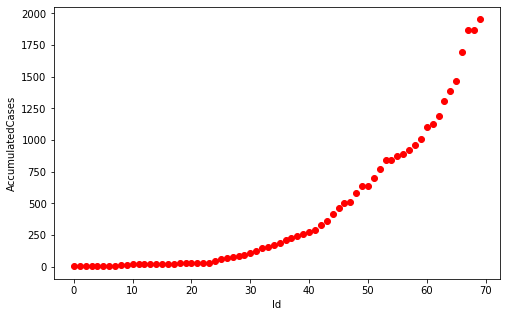

In [53]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

## Model ###

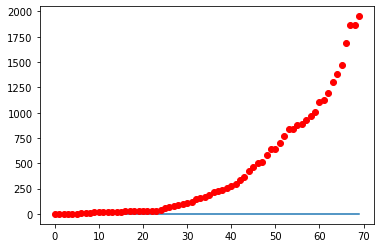

In [54]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1000.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

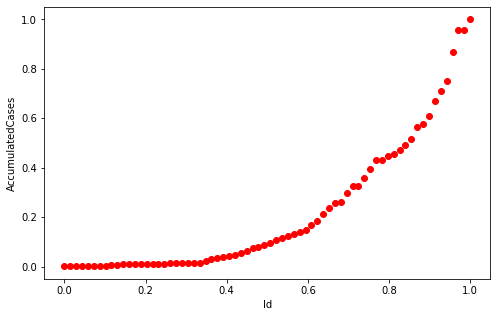

 beta_1 = 8.345407±0.321869, beta_2 = 0.808825±0.004603


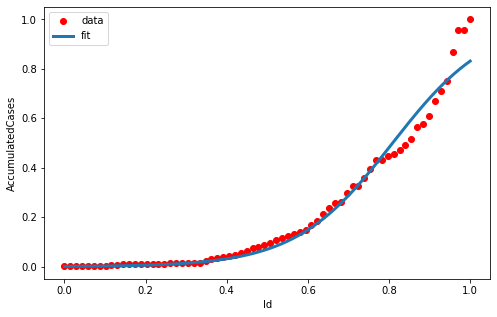

In [55]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

plt.figure(figsize=(8,5))
#x_data, y_data = (df[""].values, df[""].values)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

x = np.linspace(1,1257, 1256)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')

plt.savefig('SigmoidAnalysis.png')

plt.show()

## Accuracy 

In [56]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96


# Polynomial Regression

In [63]:
import pylab as pl

In [58]:
df = pd.read_csv("train.csv")
df = df.drop(['Province_State', 'Date'], axis = 1)
df = df.query('Country_Region == "Japan"')
df = df.rename(columns={'ConfirmedCases':'AccumulatedCases'})
df.Id = df.Id - 14201
df.tail(70)

,Id,Country_Region,AccumulatedCases,Fatalities
9940,0,Japan,2.0,0.0
9941,1,Japan,2.0,0.0
9942,2,Japan,2.0,0.0
9943,3,Japan,2.0,0.0
9944,4,Japan,4.0,0.0
...,...,...,...,...
10005,65,Japan,1468.0,49.0
10006,66,Japan,1693.0,52.0
10007,67,Japan,1866.0,54.0
10008,68,Japan,1866.0,54.0


### ?Dataset split

In [59]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Id']])
train_y = np.asanyarray(train[['AccumulatedCases']])

test_x = np.asanyarray(test[['Id']])
test_y = np.asanyarray(test[['AccumulatedCases']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 2.600e+01, 6.760e+02],
       [1.000e+00, 2.700e+01, 7.29

## Model ###

In [61]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.         -18.90957346   0.60426558]]
Intercept:  [113.95155384]


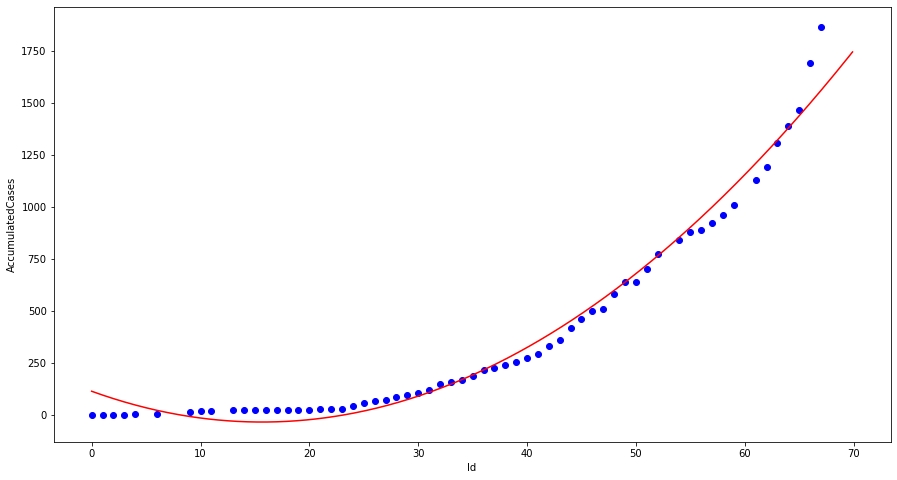

In [62]:
plt.figure(figsize=(15, 8))

plt.scatter(train.Id, train.AccumulatedCases,  color='blue')

XX = np.arange(0.0, 70.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r')

plt.xlabel("Id")
plt.ylabel("AccumulatedCases")
plt.savefig('PolynomialAnalysis.png')

## Accuracy 

In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

# end